<a href="https://colab.research.google.com/github/vishalrk1/DIP-Assignments/blob/main/DIP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [73]:
img = [[52,	55,	61,	59,	79,	61,	76,	61,],
[62,	59,	55,	104,	94,	85,	59,	71],
[63,	65,	66,	113,	144,	104,	63,	72,],
[64,	70,	70,	126,	154,	109,	71,	69],
[67,	73,	68,	106, 122,	88,	68,	68],
[68,	79,	60,	70,	77,	66,	58,	75],
[69,	85,	64,	58,	55,	61,	65,	83],
[70,	87,	69,	68,	65,	73,	78,	90,],]

In [74]:
image = np.array(img)

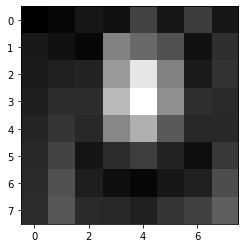

In [75]:
plt.imshow(image, cmap='gray');

In [76]:
image.shape

(8, 8)

In [77]:
unique_values, unique_count = np.unique(image, return_counts=True)
print(unique_values)
print(unique_count)

[ 52  55  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  75  76  77  78  79  83  85  87  88  90  94 104 106 109 113 122 126 144
 154]
[1 3 2 3 1 4 1 2 2 3 2 1 5 3 4 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 1]


* Calculating cumulative sum

In [78]:
sum = 0
cdf = []

for idx, i in enumerate(unique_count):
  sum += i
  cdf.append(sum)

print(cdf)

[1, 4, 6, 9, 10, 14, 15, 17, 19, 22, 24, 25, 30, 33, 37, 39, 40, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64]


* calculating **Equalized Values**

In [79]:
row = 8
column = 8

In [80]:
equalized_values = []

for idx, i in enumerate(unique_values):
  h = ((cdf[idx] - cdf[0]) / ((row*column) - cdf[0])) * (256 - 1)
  h_v = round(h)
  equalized_values.append(h_v)

print(equalized_values)

[0, 12, 20, 32, 36, 53, 57, 65, 73, 85, 93, 97, 117, 130, 146, 154, 158, 166, 170, 174, 178, 182, 190, 194, 202, 206, 210, 215, 219, 227, 231, 235, 239, 243, 247, 251, 255]


In [81]:
dict_1 = {
    'Pixel Intensity': unique_values,
    'CDF': unique_count,
    'Equalized v': equalized_values,
}

df = pd.DataFrame(dict_1)
df

,Pixel Intensity,CDF,Equalized v
0,52,1,0
1,55,3,12
2,58,2,20
3,59,3,32
4,60,1,36
5,61,4,53
6,62,1,57
7,63,2,65
8,64,2,73
9,65,3,85


In [82]:
img_new = image
print(img_new)

[[ 52  55  61  59  79  61  76  61]
 [ 62  59  55 104  94  85  59  71]
 [ 63  65  66 113 144 104  63  72]
 [ 64  70  70 126 154 109  71  69]
 [ 67  73  68 106 122  88  68  68]
 [ 68  79  60  70  77  66  58  75]
 [ 69  85  64  58  55  61  65  83]
 [ 70  87  69  68  65  73  78  90]]


In [83]:
for idx, i in enumerate(img_new):
  for index, j in enumerate(i):
    pixel = df[df['Pixel Intensity'] == j ].index[0]
    # print(f"{j} == {equalized_values[pixel]}")
    img_new[idx][index] = equalized_values[pixel]

print(img_new)

[[  0  12  53  32 190  53 174  53]
 [ 57  32  12 227 219 202  32 154]
 [ 65  85  93 239 251 227  65 158]
 [ 73 146 146 247 255 235 154 130]
 [ 97 166 117 231 243 210 117 117]
 [117 190  36 146 178  93  20 170]
 [130 202  73  20  12  53  85 194]
 [146 206 130 117  85 166 182 215]]


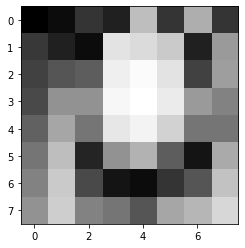

In [87]:
plt.imshow(img_new, cmap='gray')

## Full Conde

All unique pixel values: [ 52  55  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  75  76  77  78  79  83  85  87  88  90  94 104 106 109 113 122 126 144
 154]
count of all unique pixel values:[1 3 2 3 1 4 1 2 2 3 2 1 5 3 4 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 1 1]
CDF: [1, 4, 6, 9, 10, 14, 15, 17, 19, 22, 24, 25, 30, 33, 37, 39, 40, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64]
Equalized Values: [0, 12, 20, 32, 36, 53, 57, 65, 73, 85, 93, 97, 117, 130, 146, 154, 158, 166, 170, 174, 178, 182, 190, 194, 202, 206, 210, 215, 219, 227, 231, 235, 239, 243, 247, 251, 255]




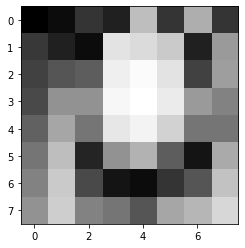

In [92]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 8x8 image from wikipedia
img = [[52,	55,	61,	59,	79,	61,	76,	61,],
[62,	59,	55,	104,	94,	85,	59,	71],
[63,	65,	66,	113,	144,	104,	63,	72,],
[64,	70,	70,	126,	154,	109,	71,	69],
[67,	73,	68,	106, 122,	88,	68,	68],
[68,	79,	60,	70,	77,	66,	58,	75],
[69,	85,	64,	58,	55,	61,	65,	83],
[70,	87,	69,	68,	65,	73,	78,	90,],]

# converting image arry into numpy array
image = np.array(img)

# finding all unique pixel values and their counts
unique_values, unique_count = np.unique(image, return_counts=True)
print(f"All unique pixel values: {unique_values}")
print(f"count of all unique pixel values:{unique_count}")

# Calculating cumalitve sum (CDF)
sum = 0
cdf = []
for idx, i in enumerate(unique_count):
  sum += i
  cdf.append(sum)

print(f"CDF: {cdf}")

# calculating equalized values
row, column = image.shape
equalized_values = []
for idx, i in enumerate(unique_values):
  h = ((cdf[idx] - cdf[0]) / ((row*column) - cdf[0])) * (256 - 1)
  h_v = round(h)
  equalized_values.append(h_v)

print(f"Equalized Values: {equalized_values}")

# Replacing pixel values with equalized values
for idx, i in enumerate(image):
  for index, j in enumerate(i):
    pixel = df[df['Pixel Intensity'] == j ].index[0]
    image[idx][index] = equalized_values[pixel]

# plotting new image
print('\n')
plt.imshow(image, cmap='gray');